In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


In [26]:
df = pd.read_csv("Data3.csv")
# df

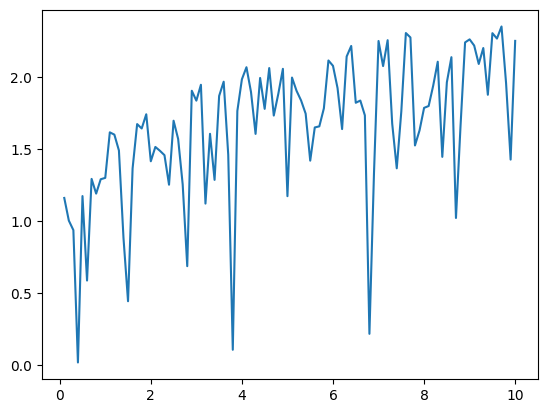

In [27]:
x = df["x"]
df["y"] = df["z"]
df = df.drop("z",axis=1)
y = df["y"]

plt.plot(x,y)

In [28]:
df.insert(0, "x0", 1)
d = 2

In [29]:
accu_vector = np.array(([0.],)*d)
accu_matrix = accu_vector * accu_vector.T
accu_matrix


array([[0., 0.],
       [0., 0.]])

In [30]:
def Xi_Xi_T(df):
    Xi_XiT_vect =  accu_matrix
    for i in range(len(df)):
        Xi_XiT_vect += (np.array((df.iloc[i][:d],)).T) @ (np.array((df.iloc[i][:d],)))
    return Xi_XiT_vect    
   
# Xi_XiT_vector = Xi_Xi_T(df)

In [31]:
inverse = np.linalg.inv(Xi_Xi_T(df))
inverse.shape 

(2, 2)

In [32]:
def XiYi(df):
    l = accu_vector
    
    for i in range(len(df)):
        l += np.array((df.iloc[i][:d],)).T @ np.array((df.iloc[i][d:],)).T
    return l    
xiyi_vector = XiYi(df)        

w = np.matmul(inverse, xiyi_vector)
w

array([[1.17706208],
       [0.09419021]])

In [33]:
def predict(vector):
    global w
    
    return w.T @ vector

def prediction_values(df):
    lst = []
    
    for i in range(len(df)):
        k = predict(df.iloc[i][:d])
        lst.append(k[0])
    return lst

prediction_val = prediction_values(df)

In [34]:
df["predicted_values"] = prediction_val
# df

RSS = np.sum((df['y'] - df['predicted_values'])**2)
TSS = np.sum((np.mean(df['y']) - df['y'])**2)
R2 = 1 - (RSS/TSS)
R2

0.3136973226728079

In [35]:
MSE = np.mean((df['y'] - df['predicted_values'])**2)
RMSE = np.sqrt(np.mean((df['y'] - df['predicted_values'])**2))
MAE = np.mean(abs(df['y'] - df['predicted_values']))
print("Mean Square Error: ", MSE)
print("Root Mean Square Error: ", RMSE)
print("Mean Absolute Error: ", MAE)
print("R square val: ",R2)

Mean Square Error:  0.16173044143088552
Root Mean Square Error:  0.4021572347116057
Mean Absolute Error:  0.29467793301310363
R square val:  0.3136973226728079


Text(0.5, 1.0, 'Linear Regression Dataset 2')

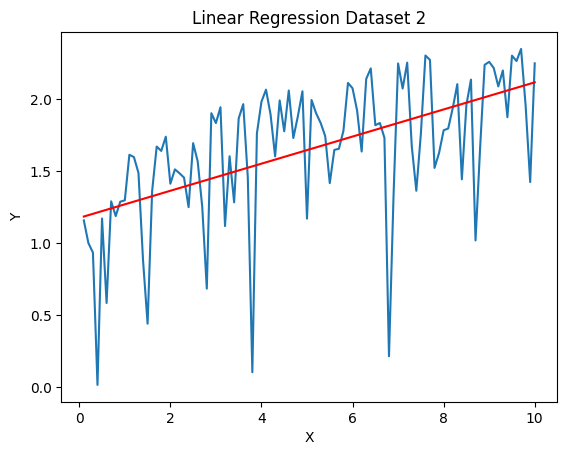

In [36]:
x = list(df["x"])
y = list(((df["y"])))
y1 = list(((df["predicted_values"])))


plt.plot(x, y)
plt.plot(x, y1, color='red')
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Linear Regression Dataset 2")
# plt./

Verification THrough Scikit-Learn

Scikit-learn Model:
Mean Squared Error: 0.16173044143088552
Mean Absolute Error: 0.2946779330131038
Root Mean Squared Error: 0.4021572347116057
R-squared: 0.3136973226728079


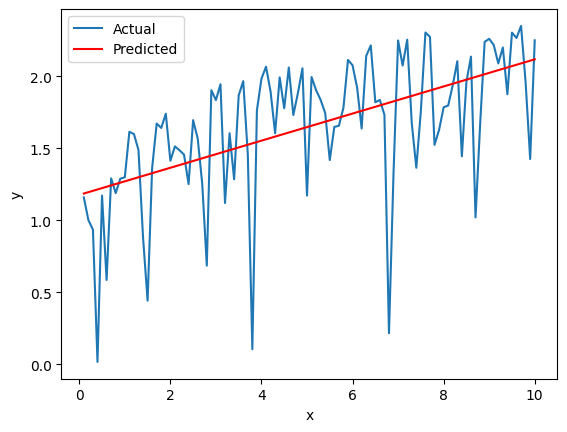

In [37]:

# Prepare the input and output data
input_columns = ['x0', 'x']
X = df[input_columns].values
y = df['y'].values

# Train a linear regression model using scikit-learn
model_sklearn = LinearRegression()
model_sklearn.fit(X, y)

# Predict using scikit-learn model
y_pred_sklearn = model_sklearn.predict(X)

# Calculate evaluation metrics using scikit-learn model
mse_sklearn = mean_squared_error(y, y_pred_sklearn)
mae_sklearn = mean_absolute_error(y, y_pred_sklearn)
rmse_sklearn = np.sqrt(mse_sklearn)
r2_sklearn = r2_score(y, y_pred_sklearn)

# Print evaluation metrics for scikit-learn model
print("Scikit-learn Model:")
print("Mean Squared Error:", mse_sklearn)
print("Mean Absolute Error:", mae_sklearn)
print("Root Mean Squared Error:", rmse_sklearn)
print("R-squared:", r2_sklearn)

plt.plot(df['x'], df['y'], label='Actual')
plt.plot(df['x'], y_pred_sklearn, color='red', label='Predicted')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()